In [141]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

PROBLEM PARAMETERS

In [ ]:
# parameters
b = 0.125
h = 0.250
Sy = 200E6
Ty = 116E6
P = 100e3
l = 1


# design variables
twmin = 2E-3
twmax = 25E-3
tbmin = 2E-3
tbmax = 25E-3

PLOT OF OBJECTIVE AND CONSTRAINTS

In [ ]:
def total_mass(x, *args):
    tb = x[0]
    tw = x[1]
    mass = 2 * tb * b + h * tw
    return mass

def intertia_moment(x, *args):
    tb = x[0]
    tw = x[1]
    moment = h**3 / 12 * tw + b /6 * tb**3 + h**2 * b /2 * tb
    return moment

def axial_stress(x, *args):
    tb = x[0]
    tw = x[1]
    I = intertia_moment(x)
    margin = P * l * h / 2 / I - Sy
    return margin

def shear_stress(x, *args):
    tb = x[0]
    tw = x[1]
    margin = 1.5 * P / h / tw - Ty
    return margin

In [144]:
# compute the analytical solution

def res(x1):
    return x1**3 * b / 6 + x1 * h**2 * b / 2 + h**3 * P / 9 / h / Ty - P * l * h / 2 / Sy

def analytical_solution():
    tw = 4 * P / 3 / h / Ty
    tb = root_scalar(res, bracket=[0.0125, 0.0175], method='bisect').root
    return tb, tw
    

In [145]:
ni, nj = 100, 100

tb = np.linspace(tbmin, tbmax, ni)
tw = np.linspace(twmin, twmax, nj)

TB, TW = np.meshgrid(tb, tw, indexing='ij')

objFunction = np.zeros((ni, nj))
axialStress = np.zeros((ni, nj))
shearStress = np.zeros((ni, nj))

for i in range(ni):
    for j in range(nj):
        objFunction[i, j] = total_mass([TB[i, j], TW[i, j]])
        axialStress[i, j] = axial_stress([TB[i, j], TW[i, j]])
        shearStress[i, j] = shear_stress([TB[i, j], TW[i, j]])

Optimal design: tb = 14.45 mm, tw = 4.60 mm


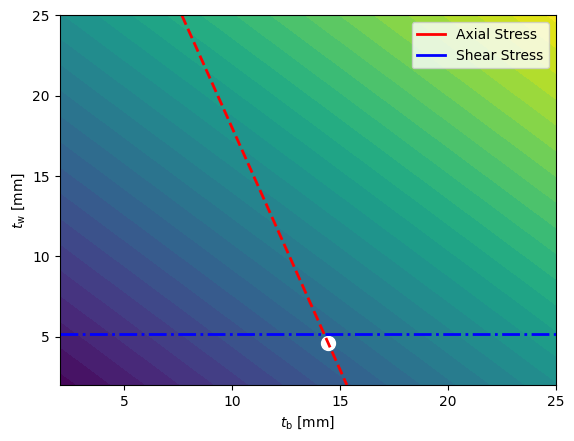

In [147]:
import matplotlib.lines as mlines



plt.figure()
plt.contourf(TB*1e3, TW*1e3, objFunction, levels=30)

# Contours
c1   = plt.contour(TB*1e3, TW*1e3, axialStress, levels=[0], colors='r', linewidths=2, linestyles='--')
c2 = plt.contour(TB*1e3, TW*1e3, shearStress, levels=[0], colors='b', linewidths=2, linestyles='-.')

# Proxy artists for legend
axial_proxy = mlines.Line2D([], [], color='r', linewidth=2, label='Axial Stress')
shear_proxy = mlines.Line2D([], [], color='b', linewidth=2, label='Shear Stress')

tbsol, twsol = analytical_solution()
plt.scatter(tbsol*1e3, twsol*1e3, marker='o', color='w', s=100, label='Optimal design')

plt.legend(handles=[axial_proxy, shear_proxy])

plt.xlabel(r'$t_{\rm b}$ [mm]')
plt.ylabel(r'$t_{\rm w}$ [mm]')

print(f"Optimal design: tb = {tbsol*1e3:.2f} mm, tw = {twsol*1e3:.2f} mm")

### CONSIDERATIONS
As expected, the minimum occurs when both constraints are active, so the beam is equally likely to fail for axial and shear stress. The mismatch could be to some typo in analytical solution or problem equations. Ex 5.9 solve numerically